## Classification

Notebook adapted and inspired from: https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

In [1]:
# some imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression

### The normal equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

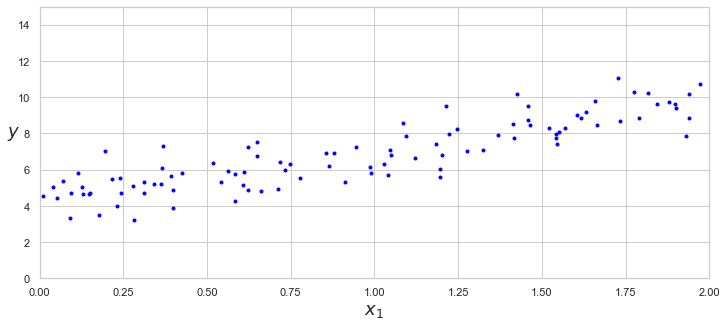

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.21509616],
       [9.75532293]])

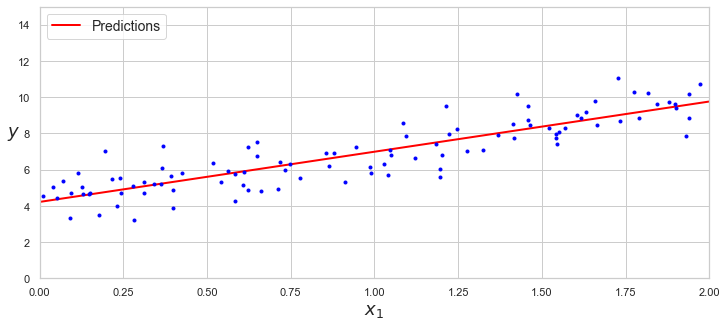

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)


array([[4.21509616],
       [9.75532293]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:



In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[4.21509616],
       [2.77011339]])

In [11]:
np.linalg.pinv(X_b).dot(y)


array([[4.21509616],
       [2.77011339]])

## Loss function -> Mean Square Error



$$\begin{align}
L(b_1,b_1) &= \frac{1}{m} \sum_1^m (y_i -\hat{y}_i)^2  \\
&= \frac{1}{m} \sum_1^m (y_i -b_0 - b_1x_i)^2
\end{align}
$$
<br>


$$\begin{align}
\frac{\partial L}{\partial b_0} &= \frac{\partial}{\partial b_0} \frac{1}{m} \sum_1^m (y_i -b_0 - b_1x_{i})^2 \\
                                &= \frac{1}{m}  \sum_1^m 2( y_i -b_0 - b_1x_1) \frac{\partial}{\partial b_0} (y_i -b_0 - b_1x_i) \\
                                &= -\frac{2}{m}  \sum_1^m ( y_i -b_0 - b_1x_1) \\
\end{align}$$


<br>
$$\begin{align}
\frac{\partial L}{\partial b_1} &= \frac{\partial}{\partial b_1} \frac{1}{m} \sum_1^m (y_i -b_0 - b_1x_1)^2 \\
                                &= \frac{1}{m}  \sum_1^m 2( y_i -b_0 - b_1x_1) \frac{\partial}{\partial b_1} (y_i -b_0 - b_1x_i) \\
                                &= -\frac{2}{m}  \sum_1^m ( y_i -b_0 - b_1x_1)x_i \\
\end{align}$$


## Gradient Descent
### Batch Gradient Decent

$$θ_{t+1}= θ_t
−
η
⋅
∇_θJ(θ_t)$$


In [46]:
lr = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients

In [47]:
theta

array([[4.21509616],
       [2.77011339]])

In [48]:
X_new_b.dot(theta)


array([[4.21509616],
       [9.75532293]])

In [52]:
theta_path_bgd = []

def plot_gradient_descent(theta, lr, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "g--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - lr * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.plot(X_new, y_predict, "r-")
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$ - $b_0={:.2f}$  -  $b_1={:.2f}$".format(lr,theta[0][0],theta[1][0]), fontsize=12)

[[ 0.49671415]
 [-0.1382643 ]]


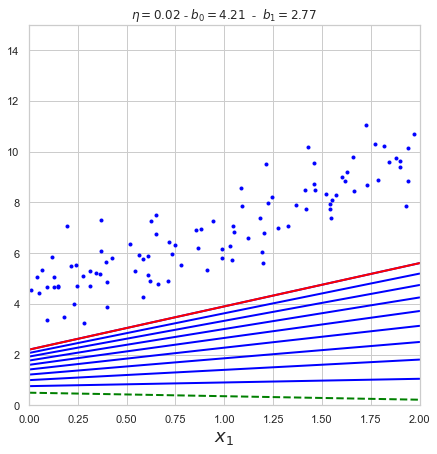

In [53]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
print(theta)
plt.figure(figsize=(7,7))
plot_gradient_descent(theta, lr=0.02)

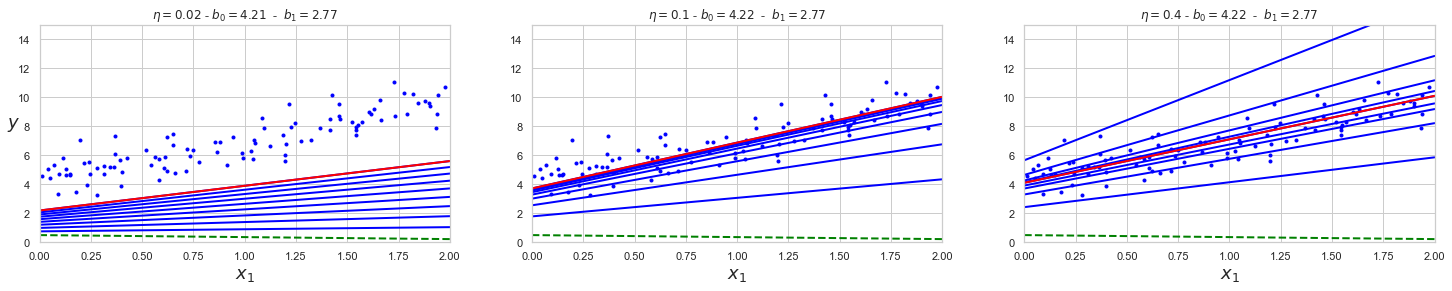

In [54]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(25,4))
plt.subplot(131); plot_gradient_descent(theta, lr=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, lr=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, lr=0.4)

plt.show()

### Stochastic Gradient Decent

Only uses one sample at each iteration
$$ θ_{t+1} =θ_t − η ⋅ ∇_θ J ( θ_t;x^{(i)};y^{(i)} )$$

In [18]:
def plot_stochastic_gradient_descent(theta, lr, n_epochs = 1, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for epoch in range(n_epochs):
        for i in range(m): # iterate over all samples
            if epoch == 0 and i < 20:                    
                y_predict = X_new_b.dot(theta)           
                style = "b-" if i > 0 else "g--"         
                plt.plot(X_new, y_predict, style)        
            random_index = np.random.randint(m) # we get a random sample
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - lr * gradients
            theta_path_sgd.append(theta)   
            if theta_path is not None:
                theta_path.append(theta)
    plt.plot(X_new, y_predict, "r-")
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$ - $b_0={:.2f}$  -  $b_1={:.2f}$".format(lr,theta[0][0],theta[1][0]), fontsize=12)

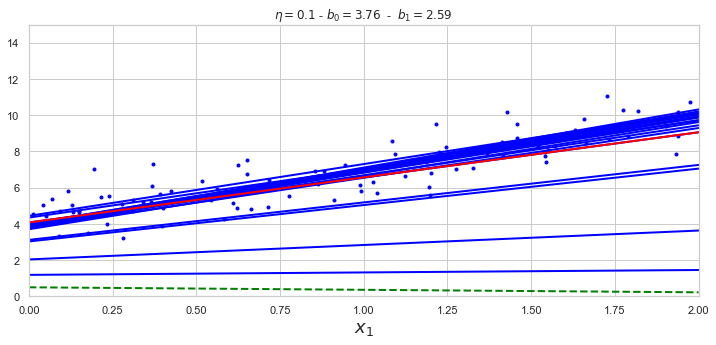

In [19]:
theta_path_sgd = []
n_epochs = 50
lr = 0.1

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
plot_stochastic_gradient_descent(theta,lr,n_epochs,theta_path_sgd)

In [20]:
theta_path_sgd = []
np.random.seed(42)

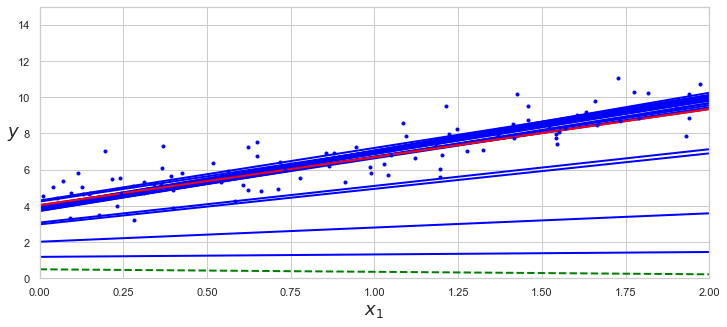

In [21]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m): # iterate over all samples
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "g--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m) # we get a random sample
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)     
        
#Final output
plt.plot(X_new, y_predict, "r-") 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()                                           

In [22]:
theta

array([[4.21076011],
       [2.74856079]])

In [23]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.24365286]), array([2.8250878]))

### Mini-batch gradient descent

Mini-batch gradient descent finally takes the best of both worlds and performs an update for every mini-batch of $n$ training examples:
$$ θ_{t+1} =θ_t − η ⋅ ∇_θ J ( θ_t;x^{(i:i+n)};y^{(i:i+n)} )$$

In [25]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [26]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [27]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)


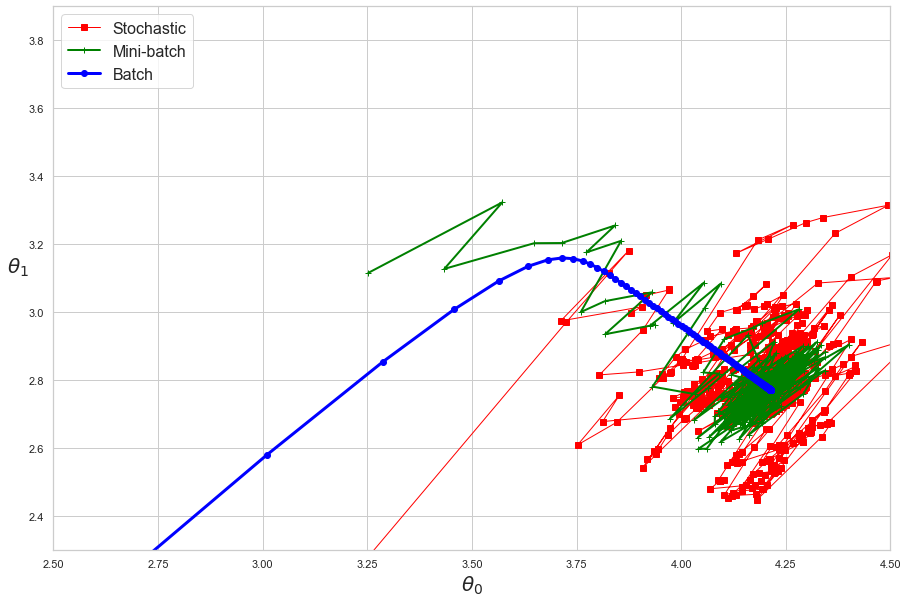

In [28]:
plt.figure(figsize=(15,10))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()